## 머신러닝 실습

### 결정트리 분석

#### 개념
- if/else 기반으로 규칙을 찾아 학습, 트리 구조의 분류규칙을 만드는 것

##### 정보이득지수
- 엔트로피 개념을 기반으로 함. 엔트로피는 데이터 집합의 혼잡도를 뜻함. 
    - 데이터 집합에 다른 데이터가 섞여서 균일도가 떨어지면 혼잡도가 높아진다고 함
    - 균일도가 높아지면 혼잡도가 낮아진다고 함
- 정보이득지수는 혼잡도가 줄어들어 얻게 되는 이득을 뜻함. **1-엔트로피**로 계산

##### 지니계수
- 데이터의 순도를 뜻함. 
    - 지니계수가 높을 수록 순도가 낮은 데이터 집합.
    - 지니계수가 0이면 완전 순수한 데이터 집합

In [4]:
## 필요라이브러리 사용등록
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

#### 데이터 수집

##### UC 어바인 ML연구소 스마트폰 센서데이터
- 웹사이트에서 다운로드 
    - https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
- 30명의 연구 자원 봉사자가 허리에 갤럭시 S2를 착용하고, 6가지 움직임을 수행, 수집한 XYZ 3축에 대한 데이터 
- 움직임 - WALKING WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

In [ ]:
## "Human Activity Recognition Using Smartphones" dataset (id=240) exists in the repository, but is not available for import.
# humanActivities = fetch_ucirepo(id=240)

In [12]:
# 피처이름 
dfFeatureName = pd.read_csv('./data/features.txt', sep='\s+', header=None, names=['index', 'feature_name'], engine='python')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\1929079331.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfFeatureName = pd.read_csv('./data/features.txt', sep='\s+', header=None, names=['index', 'feature_name'], engine='python')


In [14]:
dfFeatureName.tail()

,index,feature_name
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"


In [18]:
# index제거, 
featureNames = dfFeatureName.iloc[:, 1].values.tolist()

In [53]:
featureNames

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [51]:
## X_train, X_test, y_train, y_test 데이터로드
X_train = pd.read_csv('./data/train/X_train.txt', engine='python', sep='\s+', header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\3345871635.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('./data/train/X_train.txt', engine='python', sep='\s+', header=None)


In [28]:
X_test = pd.read_csv('./data/test/X_test.txt', engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\3782832893.py:1: SyntaxWarning: invalid escape sequence '\s'
  X_test = pd.read_csv('./data/test/X_test.txt', engine='python', sep='\s+', header=None)


In [66]:
y_train = pd.read_csv('./data/train/y_train.txt', engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\4086435897.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_train = pd.read_csv('./data/train/y_train.txt', engine='python', sep='\s+', header=None)


In [32]:
y_test = pd.read_csv('./data/test/y_test.txt', engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\821281185.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv('./data/test/y_test.txt', engine='python', sep='\s+', header=None)


In [56]:
# 561개의 컬럼에 이름을 지정
X_train.columns = featureNames

In [58]:
X_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,0.186626,0.266917,0.000698,-0.674986,-0.788077,-0.473463,-0.501092,-0.166197,0.034015,0.195643,0.140158,-0.082077,-0.561607,0.426433,-0.078255,-0.056751,-0.094106,0.099141,-0.119821,0.293112,-0.425386,0.267986,-0.205315,0.142117,-0.211822,-0.251582,-0.283335,...,-0.732995,-0.303590,0.354983,-0.904762,-0.066650,-0.076714,-0.426588,-0.332753,-0.129727,-0.128549,-0.251258,-0.995117,-0.332753,-0.605727,-0.292601,0.577573,-0.897436,-0.376234,-0.170845,-0.551898,-0.681097,-0.723951,-0.647418,-0.799450,-0.925241,-0.681097,-0.951092,-0.599074,0.310836,-0.904762,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,0.202880,0.266917,-0.041310,-0.706359,-0.804546,-0.495789,-0.520057,-0.279863,0.026565,0.178138,0.293566,-0.051532,-0.361660,0.149854,0.206839,-0.154722,0.032725,-0.057240,0.034260,0.239835,-0.364480,0.121335,0.188717,-0.207505,-0.198555,-0.225866,-0.274504,...,-0.775857,-0.373955,0.361739,-0.904762,-0.193946,-0.151879,-0.509448,-0.357992,-0.187114,-0.210320,-0.131733,-0.916112,-0.357992,-0.649987,-0.427577,0.620646,-0.846154,-0.296176,0.019626,-0.277183,-0.682756,-0.771183,-0.727039,-0.779350,-0.761880,-0.682756,-0.957032,-0.670062,0.207930,-0.904762,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,0.202880,0.264670,0.008034,-0.693162,-0.844279,-0.271194,-0.488620,-0.250723,0.334376,0.173131,0.276040,0.152003,-0.376773,0.200784,0.063584,-0.017019,-0.004323,-0.023053,0.119962,0.080689,-0.420093,0.197763,-0.033780,0.016677,-0.226826,-0.184700,-0.198452,...,-0.801702,-0.489794,0.189903,-0.904762,0.007099,0.331457,0.083984,-0.351948,-0.032290,-0.1

In [59]:
X_test.columns = featureNames

In [60]:
X_test.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,-0.160309,-0.131106,0.354922,0.188452,0.362922,-0.197803,-0.744913,-0.854291,-0.721311,-0.567761,-0.368876,-0.277531,0.128951,0.250479,0.204483,-0.336571,0.119363,0.114556,0.069925,-0.225460,0.131274,0.013961,0.163305,-0.510918,0.525957,-0.467399,0.117754,-0.258908,-0.310537,-0.022682,...,-0.822620,-0.508206,0.214449,-0.904762,-0.110967,-0.157943,-0.583573,-0.477844,-0.571234,-0.515544,-0.605614,-0.861894,-0.477844,-0.862898,-0.498796,0.491522,-0.897436,0.093839,-0.410787,-0.711904,-0.601424,-0.618829,-0.558146,-0.698564,-0.770173,-0.601424,-0.917701,-0.536164,0.365783,-0.904762,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,-0.035922,-0.131106,0.414650,-0.021580,0.218490,-0.186842,-0.755958,-0.794744,-0.708265,-0.549364,-0.353944,-0.386571,0.311991,0.277052,0.112971,-0.141648,-0.020623,0.124019,0.133963,-0.171622,0.087886,0.070093,0.085764,-0.416882,0.387530,-0.225698,-0.039828,-0.249325,-0.293864,0.031417,...,-0.741120,-0.538056,0.267662,-0.904762,0.125434,-0.223759,-0.689000,-0.491855,-0.556577,-0.525429,-0.664599,-0.682096,-0.491855,-0.861670,-0.639320,0.469640,-1.000000,0.092162,-0.449349,-0.795229,-0.566344,-0.592507,-0.530253,-0.662435,-0.947627,-0.566344,-0.904083,-0.534418,0.402907,-0.904762,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,-0.035922,-0.172677,0.402517,-0.021580,0.218490,-0.232233,-0.772925,-0.818344,-0.745217,-0.536007,-0.527129,-0.560587,0.342902,0.411568,0.167789,-0.093074,-0.146011,0.400424,-0.123618,-0.117599,0.006040,0.170446,0.047362,-0.204792,0.077011,0.291691,-0.347075,-0.351080,-0.417738,0.118835,...,-0.744405,-0.500513,0.239540,-0.904762,0.111669,0.182278,-0.095859,-0.601283,-0.

In [68]:
y_train.columns = ['action']

In [70]:
y_train.tail()

,action
7347,2
7348,2
7349,2
7350,2
7351,2


In [71]:
y_test.columns = ['action']

In [72]:
y_test.tail()

,action
2942,2
2943,2
2944,2
2945,2
2946,2


In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [78]:
## Action의 개수
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [83]:
labelName = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16124\3713291607.py:1: SyntaxWarning: invalid escape sequence '\s'
  labelName = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()


##### 분석모델 구축

In [84]:
## 결정트리 라이브러리 사용등록
from sklearn.tree import DecisionTreeClassifier

In [85]:
# 모델생성
model = DecisionTreeClassifier(random_state=40)

In [86]:
# 모델훈련
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [88]:
# 예측
y_predict = model.predict(X_test)

##### 분석지표 확인

In [87]:
## 분석지표용 라이브러리 사용등록
from sklearn.metrics import accuracy_score

In [89]:
# 정확도 판단
accuracy_score(y_test, y_predict)

0.8547675602307431

In [91]:
## 현재 하이퍼매개변수 확인
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

##### 정확도를 높이기

In [92]:
## 추가 라이브러리 사용등록
from sklearn.model_selection import GridSearchCV

In [93]:
params = { 'max_depth' : [6, 8, 10, 12, 16, 20, 24] }

gridCV = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [95]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [97]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.848751,0.944879
1,8,0.852567,0.982692
2,10,0.849440,0.993403
3,12,0.847127,0.997212
4,16,0.849441,0.999660
5,20,0.849169,0.999966
6,24,0.849848,1.000000


In [98]:
## 하이퍼 파라미터를 변경 
params = { 'max_depth': [8, 10, 16], 'min_samples_split': [2, 20, 24]}
gridCV = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [99]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [8, 10, 16],
                         'min_samples_split': [2, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [100]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,2,0.852567,0.982692
1,8,20,0.852838,0.978781
2,8,24,0.851615,0.978237
3,10,2,0.849440,0.993403
4,10,20,0.850801,0.985786
5,10,24,0.857873,0.984256
6,16,2,0.849441,0.999660
7,16,20,0.847127,0.988473
8,16,24,0.849574,0.986738


In [101]:
gridCV.best_score_

0.8578731669418277

In [102]:
gridCV.best_params_

{'max_depth': 10, 'min_samples_split': 24}

In [103]:
gridCV.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=24, random_state=40)

In [105]:
## 최고 예측치로 다시 예측
bestModel = gridCV.best_estimator_

In [106]:
best_y_predict = bestModel.predict(X_test)

In [107]:
## 정확도 
accuracy_score(y_test, best_y_predict)

0.8663047166610112

##### 시각화

In [112]:
## 독립변수 561개 중 중요도 높은 변수를 찾는 것
len(bestModel.feature_importances_)

561

In [113]:
featureImportances = bestModel.feature_importances_

In [117]:
featureTop10 = pd.Series(featureImportances, index=X_train.columns).sort_values(ascending=False)[:10]

In [118]:
featureTop10

tGravityAcc-min()-X                0.248497
fBodyAccJerk-bandsEnergy()-1,16    0.208508
angle(Y,gravityMean)               0.137694
fBodyAccMag-energy()               0.113264
tGravityAcc-arCoeff()-Z,2          0.099601
fBodyGyro-maxInds-X                0.023511
tBodyGyro-correlation()-Y,Z        0.016197
tGravityAcc-energy()-Y             0.016118
tBodyAccMag-arCoeff()1             0.012370
tBodyGyro-max()-X                  0.008973
dtype: float64

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

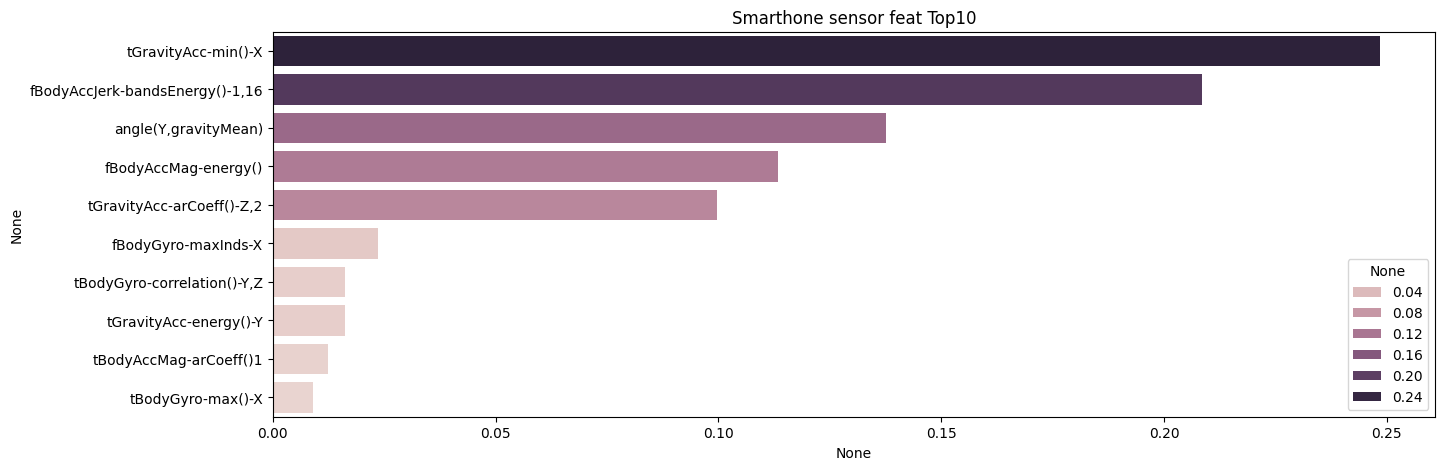

In [124]:
## 바차트
plt.figure(figsize=(15, 5))
plt.title('Smarthone sensor feat Top10')
sns.barplot(x=featureTop10, y=featureTop10.index, hue=featureTop10)
plt.show()